# 主题建模 LDA  无监督机器学习

In [25]:
%matplotlib inline
from __future__ import print_function
from wordcloud import WordCloud
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Load the data
corpus = corpora.BleiCorpus('/Users/sophiasun/Github/cjc2016/data/ap/ap.dat', '/Users/sophiasun/Github/cjc2016/data/ap/vocab.txt')

In [27]:
corpus

In [28]:
' '.join(dir(corpus))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __iter__ __len__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _load_specials _save_specials _smart_save docbyoffset fname id2word index length line2doc load save save_corpus serialize'

In [29]:
corpus.id2word.items()[0:10]  #给每一词对应一个数字id

[(0, u'i'),
 (1, u'new'),
 (2, u'percent'),
 (3, u'people'),
 (4, u'year'),
 (5, u'two'),
 (6, u'million'),
 (7, u'president'),
 (8, u'last'),
 (9, u'government')]

# Build the topic model

In [30]:
NUM_TOPICS = 100

In [31]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

In [32]:
corpus.id2word

{0: u'i',
 1: u'new',
 2: u'percent',
 3: u'people',
 4: u'year',
 5: u'two',
 6: u'million',
 7: u'president',
 8: u'last',
 9: u'government',
 10: u'years',
 11: u'first',
 12: u'police',
 13: u'state',
 14: u'states',
 15: u'officials',
 16: u'soviet',
 17: u'united',
 18: u'bush',
 19: u'time',
 20: u'three',
 21: u'billion',
 22: u'today',
 23: u'national',
 24: u'told',
 25: u'american',
 26: u'thursday',
 27: u'federal',
 28: u'house',
 29: u'week',
 30: u'court',
 31: u'day',
 32: u'tuesday',
 33: u'made',
 34: u'news',
 35: u'wednesday',
 36: u'monday',
 37: u'friday',
 38: u'say',
 39: u'company',
 40: u'city',
 41: u'party',
 42: u'just',
 43: u'group',
 44: u'york',
 45: u'market',
 46: u'report',
 47: u'department',
 48: u'military',
 49: u'south',
 50: u'union',
 51: u'members',
 52: u'home',
 53: u'west',
 54: u'political',
 55: u'reported',
 56: u'make',
 57: u'going',
 58: u'office',
 59: u'get',
 60: u'spokesman',
 61: u'dont',
 62: u'world',
 63: u'like',
 64: u'four

In [33]:
' '.join(dir(model))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _apply _load_specials _save_specials _smart_save alpha bound chunksize clear decay dispatcher distributed do_estep do_mstep eta eval_every expElogbeta gamma_threshold get_document_topics get_topic_terms id2word inference init_dir_prior iterations load log_perplexity minimum_probability num_terms num_topics num_updates numworkers offset optimize_alpha optimize_eta passes print_topic print_topics save show_topic show_topics state sync_state top_topics update update_alpha update_eta update_every'

# We can see the list of topics a document refers to 

In [34]:
document_topics = [model[c] for c in corpus]

In [35]:
# how many topics does one document cover?
document_topics[2]   #第三篇文本的主题，每个数字对应一个topic，后面那个是权重

[(3, 0.012541549667499098),
 (4, 0.010694661401495262),
 (14, 0.060010020479472508),
 (25, 0.20382724075338629),
 (26, 0.023671295637897702),
 (27, 0.43392825113056932),
 (36, 0.014083191784917487),
 (44, 0.14680386268140819),
 (54, 0.017315282696281104),
 (81, 0.014456626367380829),
 (84, 0.048566808208207704)]

In [36]:
# The first topic
# format: weight, term
model.show_topic(0, 10)  #第一个topic，按权重排序，最重要的10个词

[(u'roberts', 0.021894766955090815),
 (u'm', 0.0092775984700937276),
 (u'walters', 0.0083361293557432069),
 (u'cdy', 0.0070002852956939348),
 (u'heseltine', 0.0068707293114431264),
 (u'cavazos', 0.0063730810265447396),
 (u'clr', 0.0062641108349951536),
 (u'party', 0.0059277105985014195),
 (u'universities', 0.005398144091612626),
 (u'people', 0.0049452706511501424)]

In [37]:
# The 100 topic
# format: weight, term
model.show_topic(99, 10)

[(u'air', 0.013650005074387354),
 (u'langley', 0.0097375970499532609),
 (u'fa', 0.0089457787081558809),
 (u'atkins', 0.0080489854895080641),
 (u'stealth', 0.0076407951868867115),
 (u'force', 0.0072030425143396861),
 (u'nam', 0.0070559609471003209),
 (u'bombers', 0.0066800265913009764),
 (u'last', 0.0058037901979280408),
 (u'new', 0.0056248011578657877)]

In [38]:
words = model.show_topic(0, 5)
words

[(u'roberts', 0.021894766955090815),
 (u'm', 0.0092775984700937276),
 (u'walters', 0.0083361293557432069),
 (u'cdy', 0.0070002852956939348),
 (u'heseltine', 0.0068707293114431264)]

In [39]:
model.show_topics(4)  #四个topic，每个topic下的词语，权重

[(61,
  u'0.013*keefe + 0.011*percent + 0.010*rings + 0.008*survey + 0.007*dress + 0.007*i + 0.006*benson + 0.005*refugees + 0.005*years + 0.004*year'),
 (36,
  u'0.042*hyundai + 0.016*immigrants + 0.013*seoul + 0.009*champions + 0.008*thursday + 0.007*engineering + 0.007*officials + 0.007*displayed + 0.006*graves + 0.006*years'),
 (48,
  u'0.008*court + 0.006*i + 0.006*book + 0.006*supreme + 0.006*last + 0.005*rights + 0.005*abroad + 0.005*years + 0.004*told + 0.004*constitution'),
 (88,
  u'0.018*hamilton + 0.013*greece + 0.008*card + 0.008*police + 0.007*nelson + 0.007*prayers + 0.006*greek + 0.005*boston + 0.005*named + 0.005*memorial')]

In [40]:
words[:5]

[(u'roberts', 0.021894766955090815),
 (u'm', 0.0092775984700937276),
 (u'walters', 0.0083361293557432069),
 (u'cdy', 0.0070002852956939348),
 (u'heseltine', 0.0068707293114431264)]

In [41]:
for f, w in words[:10]:
    print(f, w)

roberts 0.0218947669551
m 0.00927759847009
walters 0.00833612935574
cdy 0.00700028529569
heseltine 0.00687072931144


In [42]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(w for f, w in words)
    with open('/Users/sophiasun/Github/cjc2016/data/topics_term_weight.txt', 'a') as output:
        for f, w in words:
            line = str(ti) + '\t' +  f + '\t' + str(w/tf) 
            output.write(line + '\n')

In [43]:
# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1) #给它一个权重
max_topic = weight.argmax()

In [44]:
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64) # Get the top 64 words for this topic 
words = np.array(words).T  #np.array矩阵 T横竖转换
words_freq=[float(i)*10000000 for i in words[1]]  #将第二列的w *10000000
words = zip(words[0], words_freq)  #将f,w一一对应起来

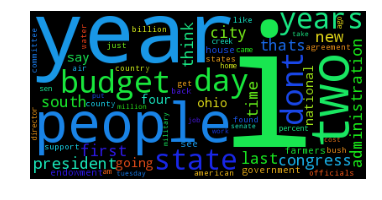

In [45]:
wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

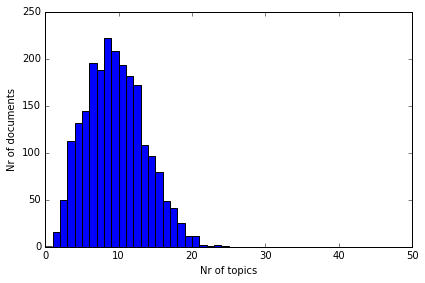

In [46]:
num_topics_used = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(50))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

# We can see that about 150 documents have 5 topics
- while the majority deal with around 10 to 12 of them. 
    - No document talks about more than 20 topics.

In [47]:
# Now, repeat the same exercise using alpha=1.0  
# You can edit the constant below to play around with this parameter
ALPHA = 2.0  #参数
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

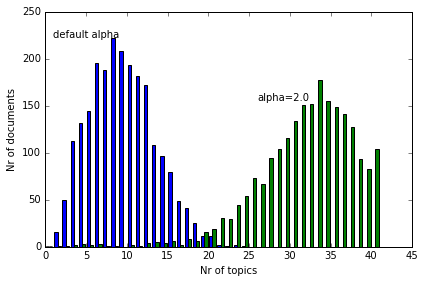

In [48]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
# The coordinates below were fit by trial and error to look good
plt.text(1, 223, r'default alpha')   #(1, 223）文本标记的位置
plt.text(26, 156, 'alpha=2.0')      #alpha最优值
fig.tight_layout()

# 使用pyLDAvis可视化主体模型

# 读取并清洗数据

In [5]:
with open('/Users/sophiasun/Github/cjc2016/data/ap/ap.txt', 'r') as f:
    dat = f.readlines()

In [6]:
dat[:6]

['<DOC>\n',
 '<DOCNO> AP881218-0003 </DOCNO>\n',
 '<TEXT>\n',
 " A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Fri

In [7]:
dat[4].strip()[0]

'<'

In [8]:
docs = []
for i in dat[:100]:
    if i.strip()[0] != '<':
        docs.append(i)

In [13]:
def clean_doc(doc):
    doc = doc.replace('.', '').replace(',', '')
    doc = doc.replace('``', '').replace('"', '')
    doc = doc.replace('_', '').replace("'", '')
    doc = doc.replace('!', '')
    return doc
docs = [clean_doc(doc) for doc in docs]

In [9]:
texts = [[i for i in doc.lower().split()] for doc in docs]

In [10]:
texts

[['a',
  '16-year-old',
  'student',
  'at',
  'a',
  'private',
  'baptist',
  'school',
  'who',
  'allegedly',
  'killed',
  'one',
  'teacher',
  'and',
  'wounded',
  'another',
  'before',
  'firing',
  'into',
  'a',
  'filled',
  'classroom',
  'apparently',
  '``just',
  "snapped,''",
  'the',
  "school's",
  'pastor',
  'said.',
  '``i',
  "don't",
  'know',
  'how',
  'it',
  'could',
  'have',
  "happened,''",
  'said',
  'george',
  'sweet,',
  'pastor',
  'of',
  'atlantic',
  'shores',
  'baptist',
  'church.',
  '``this',
  'is',
  'a',
  'good,',
  'christian',
  'school.',
  'we',
  'pride',
  'ourselves',
  'on',
  'discipline.',
  'our',
  'kids',
  'are',
  'good',
  "kids.''",
  'the',
  'atlantic',
  'shores',
  'christian',
  'school',
  'sophomore',
  'was',
  'arrested',
  'and',
  'charged',
  'with',
  'first-degree',
  'murder,',
  'attempted',
  'murder,',
  'malicious',
  'assault',
  'and',
  'related',
  'felony',
  'charges',
  'for',
  'the',
  'frida

In [ ]:
import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [1]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [11]:
' '.join(stop)

u'i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don should now d ll m o re ve y ain aren couldn didn doesn hadn hasn haven isn ma mightn mustn needn shan shouldn wasn weren won wouldn said'

In [12]:
stop.append('said')

In [13]:
from collections import defaultdict
frequency = defaultdict(int)   #创建value为整数的字典，value=frequency; key是token
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1 and token not in stop]
        for text in texts]

In [14]:
docs[8]

' Here is a summary of developments in forest and brush fires in Western states:\n'

In [15]:
' '.join(texts[9])

'2 man extreme-right national front party le died saturday automobile police said. 43. stirbois political friday city miles west paris, traveling toward capital car ran police said. stirbois national front party since born paris, law headed business. stirbois several extreme-right political joining national front percent vote local elections west _ highest vote percentage year half later, deputy stirbois deputy national lost elections last national founded le pen government death priority first presidential le pen percent national front could'

In [23]:
dictionary = corpora.Dictionary(texts)
lda_corpus = [dictionary.doc2bow(text) for text in texts]
#The function doc2bow() simply counts the number of occurences of each distinct word,  token在各个文本中的frequency
# converts the word to its integer word id and returns the result as a sparse vector.  稀疏向量，很多texts的fre是0，在其他文本中。

In [53]:
lda_corpus    #id2token

[[(0, 4),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 7),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 2),
  (14, 1),
  (15, 4),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 5),
  (22, 2),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 2),
  (43, 2),
  (44, 5),
  (45, 1),
  (46, 4),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 4),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 2),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 6),
  (81, 2),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 4),
  (87, 2),
  (88, 2),
  (89, 2),
  (90, 1),
  (91, 1)

In [49]:
lda_model = models.ldamodel.LdaModel(
    lda_corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha=None)

In [50]:
import pyLDAvis.gensim

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary)

/Users/sophiasun/anaconda/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.174970061728 and the largest is 0.717751496718.
  RuntimeWarning


In [51]:
pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [52]:
pyLDAvis.save_html(ap_data, '/Users/sophiasun/Github/Class/5.20/ap_ldavis.html')